In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
book_df = pd.read_csv("data/Books.csv", sep=";")
rating_df= pd.read_csv("data/Ratings.csv",sep=";")
user_df= pd.read_csv("data/Users.csv",sep=";")

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_18656\3932879330.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_df= pd.read_csv("data/Users.csv",sep=";")


In [3]:
book_df.head()

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [4]:
rating_df.head()

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
user_df.head()

,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN


In [6]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271379 non-null  object
 1   Title      271379 non-null  object
 2   Author     271377 non-null  object
 3   Year       271379 non-null  int64 
 4   Publisher  271377 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278859 non-null  object
 1   Age      168627 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB


In [9]:
rating_df['Rating'].value_counts().sort_index()

Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64

In [10]:
#Removing rating count of 0

In [11]:
rating_df = rating_df[rating_df['Rating']!=0]

In [12]:
len(rating_df)

433671

In [13]:
print("Total ratings:", len(rating_df))
print("Unique users:", rating_df['User-ID'].nunique())
print("Unique books:", rating_df['ISBN'].nunique())

Total ratings: 433671
Unique users: 77805
Unique books: 185973


In [14]:
rating_df.describe()

,User-ID,Rating
count,433671.000000,433671.000000
mean,135458.743451,7.601066
std,80678.385078,1.843798
min,8.000000,1.000000
25%,66619.000000,7.000000
50%,133184.000000,8.000000
75%,205735.000000,9.000000
max,278854.000000,10.000000


In [15]:
num_users = rating_df['User-ID'].nunique()
num_books = rating_df['ISBN'].nunique()
num_ratings = len(rating_df)

sparsity = 1 - (num_ratings / (num_users * num_books))

print("Sparsity:", sparsity)


Sparsity: 0.9999700288796584


In [16]:
rating_user_df = rating_df.groupby('User-ID').count()

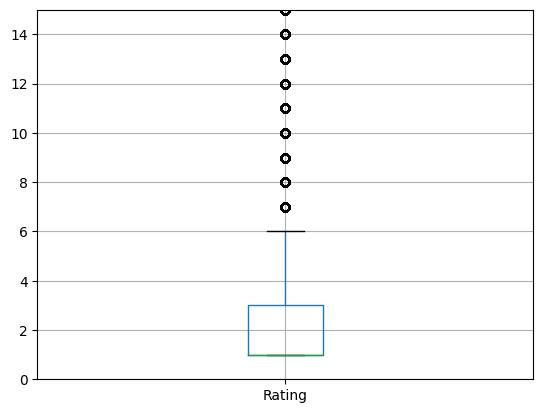

In [17]:
fig, ax = plt.subplots()
rating_user_df.boxplot(column=['Rating'])
# plt.yticks(range(0,1500,100))
ax.set_ylim(0,15)
plt.show()

In [18]:
rating_user_double_count = rating_user_df.groupby('ISBN').count()

In [19]:
rating_user_double_count

,Rating
ISBN,
1,45382
2,9855
3,5154
4,3194
5,2201
...,...
1395,1
1906,1
1969,1


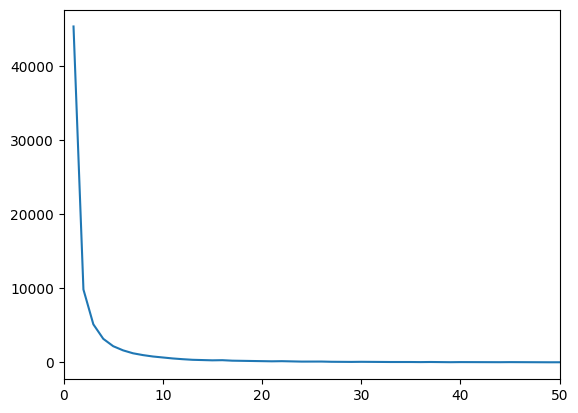

In [20]:
fig, ax = plt.subplots()
plt.plot(rating_user_double_count.index,rating_user_double_count["Rating"])
ax.set_xlim(0,50)
plt.show()

In [21]:
####  Here only few people have given and there are outlier who read 5000 book which is crazy so elimiation 
#### all of them , only including rating count from 5 to 2000

In [22]:
user_counts = rating_df['User-ID'].value_counts()

active_users = user_counts[(user_counts > 5) & (user_counts < 2000)].index

rating_df = rating_df[rating_df['User-ID'].isin(active_users)]


In [23]:
rating_df

,User-ID,ISBN,Rating
118,276813,8423996565,8
120,276813,8426449476,8
121,276813,8426449573,6
122,276813,8478884831,8
123,276813,8478885218,6
...,...,...,...
1149743,276688,0836218655,10
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149746,276688,1551669315,6


In [24]:
book_counts = rating_df['ISBN'].value_counts()

popular_books = book_counts[book_counts > 5].index

rating_df = rating_df[rating_df['ISBN'].isin(popular_books)]

In [25]:
print("After filtering:")
print("Total ratings:", len(rating_df))
print("Unique users:", rating_df['User-ID'].nunique())
print("Unique books:", rating_df['ISBN'].nunique())

After filtering:
Total ratings: 116296
Unique users: 10910
Unique books: 7833


In [27]:
data = rating_df.merge(book_df, on='ISBN')
data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Natural California: A Postcard Book                                           10.0
Six by Seuss: A Treasury of Dr. Seuss Classics                                10.0
The Lord of the Rings                                                         10.0
Postmarked Yesteryear: 30 Rare Holiday Postcards                              10.0
Oh, the Thinks You Can Think! (I Can Read It All by Myself Beginner Books)    10.0
Name: Rating, dtype: float64

In [28]:
popularity_df = data.groupby('Title').agg({
    'Rating': ['count', 'mean']
})

popularity_df.columns = ['num_ratings', 'avg_rating']

popularity_df = popularity_df.sort_values(
    by='num_ratings',
    ascending=False
)


In [29]:
popularity_df.head(10)


,num_ratings,avg_rating
Title,,
The Lovely Bones: A Novel,401,8.286783
The Da Vinci Code,319,8.545455
Bridget Jones's Diary,268,7.660448
The Secret Life of Bees,262,8.534351
Harry Potter and the Chamber of Secrets (Book 2),261,8.888889
Wild Animus,246,4.032520
The Nanny Diaries: A Novel,243,7.407407
The Red Tent (Bestselling Backlist),228,8.377193
Life of Pi,227,8.145374


In [39]:
popularity_df.to_csv("data/data.csv")